##  Question::::Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import plot_tree

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


## __1 - Business Problem__  
___Use Decision Tree to prepare a model on fraud data___  

## __2 - Data collection and description__ 

In [50]:
df = pd.read_csv("Fraud_check (1).csv")

In [51]:
df1 = df.copy()

In [52]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [8]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Outlier Check

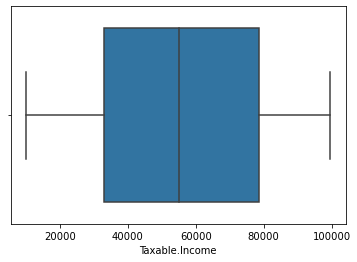

In [10]:
ax = sns.boxplot(df1['Taxable.Income'])

### There are no outliers in the data

In [11]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


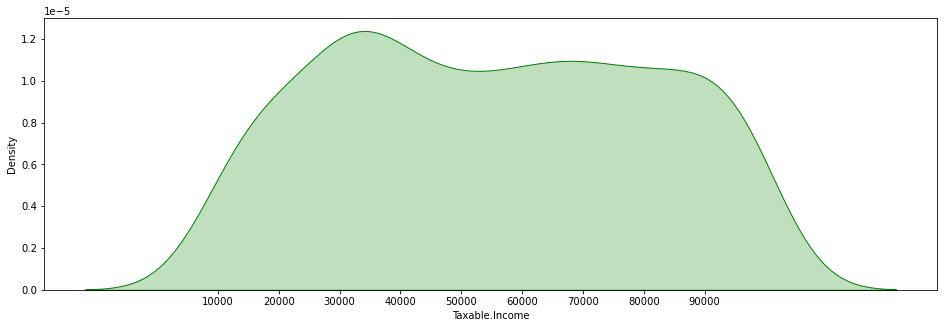

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

### The data is Skwed on the right  
### The data has negative Kurtosis

In [13]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

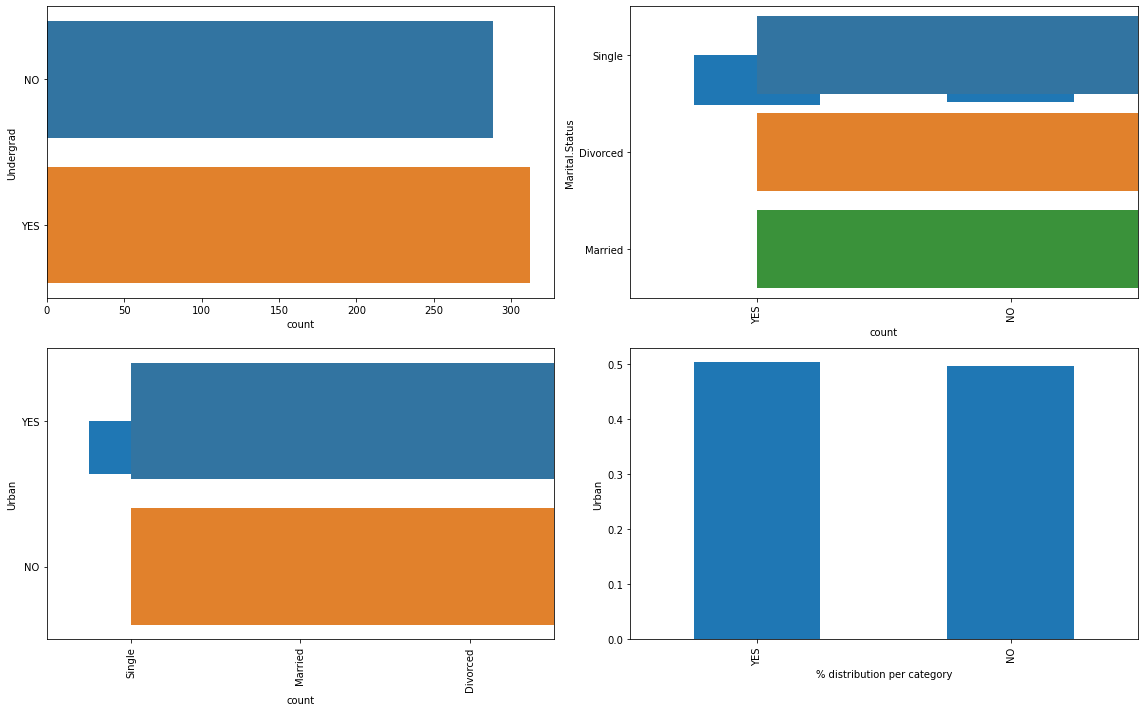

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [15]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

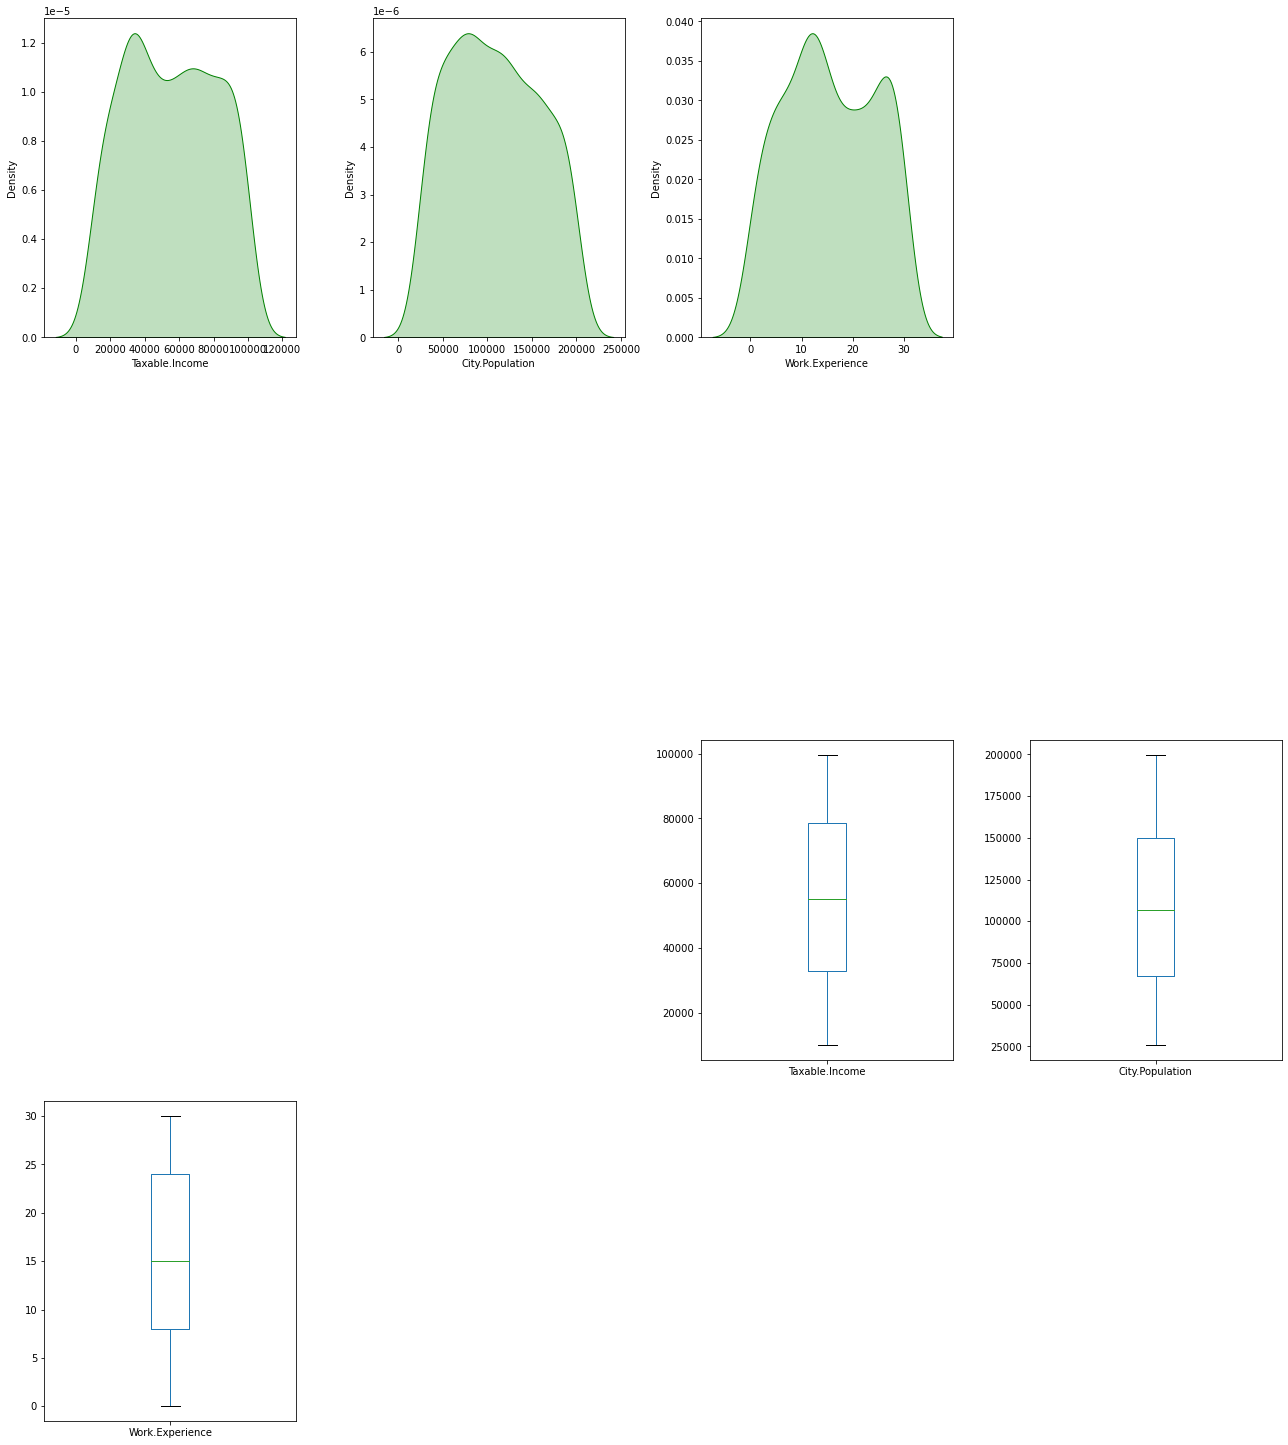

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [17]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [18]:
corr = df1.corr()

In [19]:
corr = df1.corr()

<AxesSubplot:>

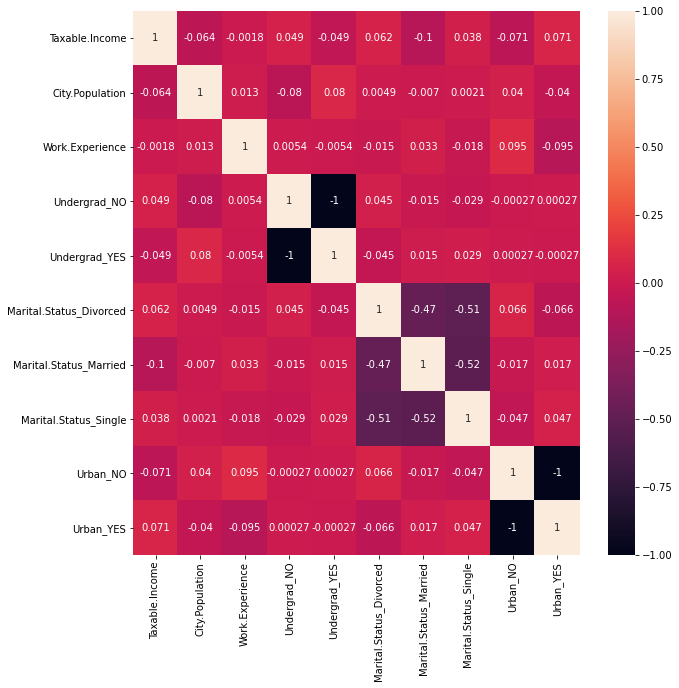

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## __3 - Decision Tree Model__ 

### Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"   

In [21]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [22]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [23]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
y_train.value_counts()

good     386
risky     94
Name: Taxable.Income, dtype: int64

In [66]:
DT_model =DecisionTreeClassifier(criterion ='gini',max_depth=4,max_features=4) 
DT_model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4, max_features=4)

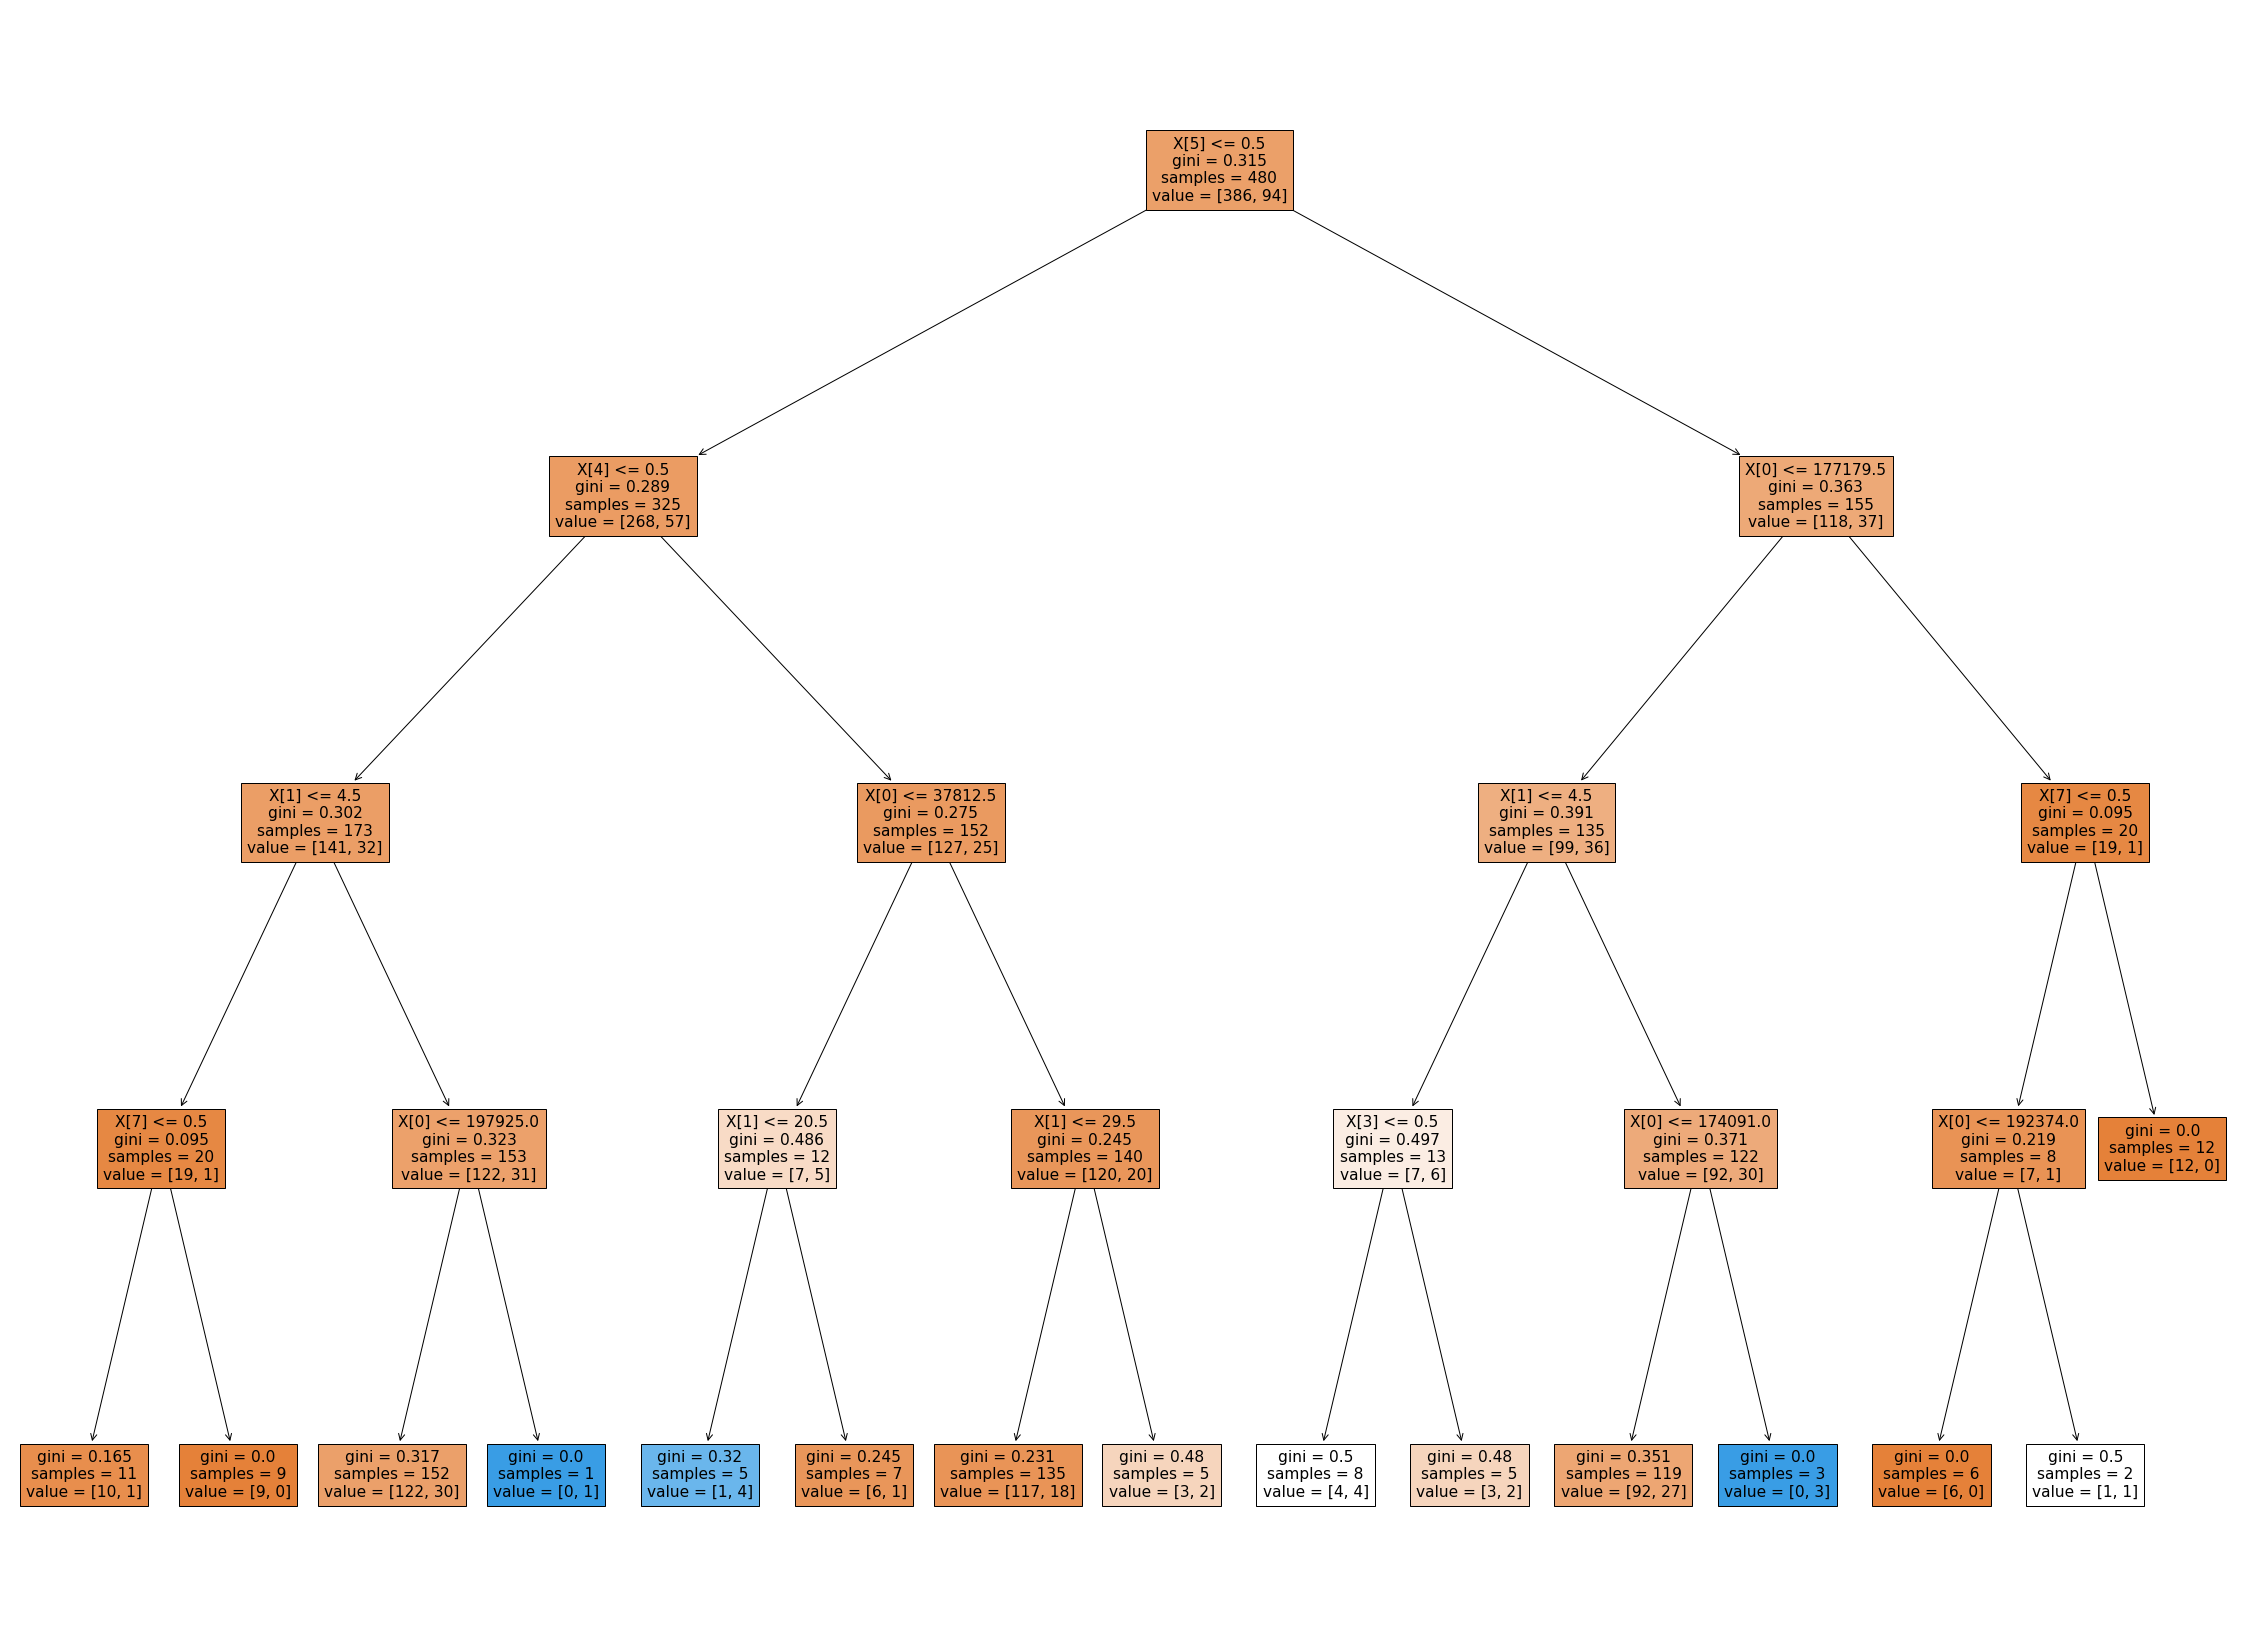

In [67]:
plt.figure(figsize=(40,30))
plot_tree(decision_tree = DT_model,filled=True,proportion=False)

plt.show()

## Training Data

In [68]:
pred_train = DT_model.predict(x_train)

In [69]:
accuracy_score(y_train,pred_train)

0.81875

In [70]:
confusion_matrix(y_train,pred_train)

array([[385,   1],
       [ 86,   8]], dtype=int64)

In [71]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

        good       0.82      1.00      0.90       386
       risky       0.89      0.09      0.16        94

    accuracy                           0.82       480
   macro avg       0.85      0.54      0.53       480
weighted avg       0.83      0.82      0.75       480



## Testing  DATA

In [72]:
pred_test = DT_model.predict(x_test)

In [73]:
accuracy_score(y_test,pred_test)

0.7333333333333333

In [74]:
confusion_matrix(y_test,pred_test)

array([[87,  3],
       [29,  1]], dtype=int64)

In [75]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

        good       0.75      0.97      0.84        90
       risky       0.25      0.03      0.06        30

    accuracy                           0.73       120
   macro avg       0.50      0.50      0.45       120
weighted avg       0.62      0.73      0.65       120



In [76]:
df_testing=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [77]:
df_testing.head()

,Actual,Predicted
106,risky,good
239,good,good
165,good,good
274,good,good
514,good,risky


In [78]:
df_testing.value_counts()

Actual  Predicted
good    good         87
risky   good         29
good    risky         3
risky   risky         1
dtype: int64

##  3. BY using Gridsearchcv

In [83]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = DT_model,
                           param_grid = {'criterion':['gini','entropy'],
                                         'max_depth':[3,4,5,6,7,8,9]},
                           cv = 5)
grid_search.fit(X,y)

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [96]:
DT_modelcv =DecisionTreeClassifier(criterion ='gini',max_depth=3) 
DT_modelcv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [97]:
pred_y_train=DT_modelcv.predict(x_train)

In [98]:
accuracy_score(y_train,pred_y_train)

0.8166666666666667

In [99]:
confusion_matrix(y_train,pred_y_train)

array([[383,   3],
       [ 85,   9]], dtype=int64)

In [100]:
pred_x_test=DT_modelcv.predict(x_test)

In [102]:
accuracy_score(y_test,pred_x_test)

0.7416666666666667

In [103]:
confusion_matrix(y_test,pred_x_test)

array([[89,  1],
       [30,  0]], dtype=int64)

## __4 - Conclusion__ 

### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 74%  
### As seen in the confusion matrix of Test data 89 instances are presdected correctly and 31 instances are not

In [109]:
DT_model.feature_importances_

array([0.58241838, 0.33814716, 0.        , 0.00406327, 0.00448914,
       0.05557554, 0.        , 0.01530651, 0.        ])

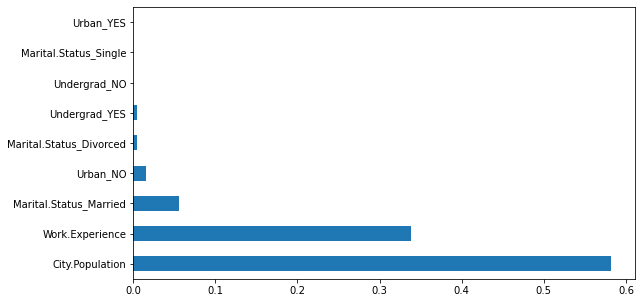

In [111]:
feat_importances = pd.Series(DT_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [114]:
features = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': DT_model.feature_importances_}).\
                    sort_values('importance', ascending = True)

In [115]:
features

,feature,importance
2,Undergrad_NO,0.000000
6,Marital.Status_Single,0.000000
8,Urban_YES,0.000000
3,Undergrad_YES,0.004063
4,Marital.Status_Divorced,0.004489
7,Urban_NO,0.015307
5,Marital.Status_Married,0.055576
1,Work.Experience,0.338147
0,City.Population,0.582418


### As seen in the above table city population is most important feature

## ==============The END============================